[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


# 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/TTF/NanumGothic.ttf'  
                    # ex - 'C:/asiahead4.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()

# plt.rc("font", family="Malgun Gothic")
# plt.rc("font", family="AppleGothic")
# plt.rc("font", family="NanumGothic")
plt.rc("font", family=font_name)
plt.rc("axes", unicode_minus=False)

In [5]:
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

* sns.set 은 기본설정이기 때문에 한번에 다해야만 함

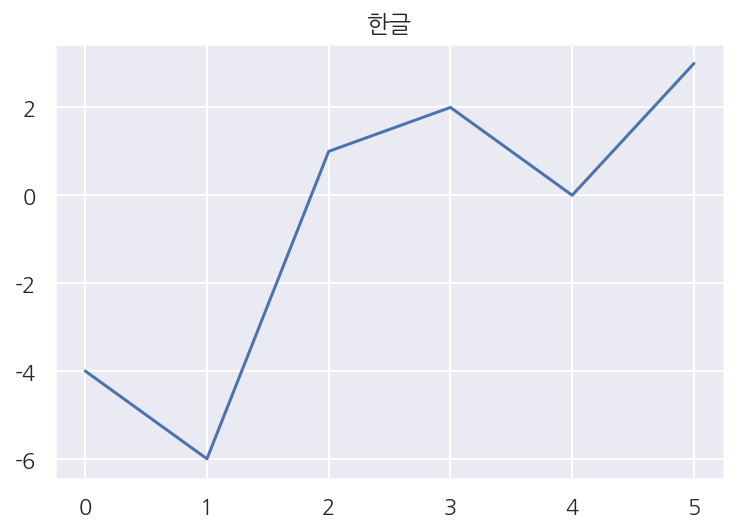

In [6]:
# 한글폰트 설정 확인을 합니다.
plt.title('한글')
plt.plot([-4,-6,1,2,0,3])



In [7]:
# 그래프가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 데이터 로드

In [8]:
# 데이터를 로드해서 df 라는 변수에 담습니다.

df = pd.read_csv("data/전국도시공원표준데이터.csv", encoding="cp949")
df.shape


(18137, 20)

In [9]:
# 미리보기를 합니다.

df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


## Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* conda : `conda install -c conda-forge pandas-profiling`
* pip : `pip install pandas-profiling`

In [10]:
# 버전에 따라 기능의 차이가 있습니다. 
# 이 강좌에서 사용하는 버전은 다음과 같습니다.

import pandas_profiling

pandas_profiling.__version__

'2.9.0'

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [12]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.
from pandas_profiling import ProfileReport

%time profile = ProfileReport(df, title="도시공원 표준 데이터")
profile.to_file(output_file="05-park_pandas_profile.html")

CPU times: user 99.9 ms, sys: 0 ns, total: 99.9 ms
Wall time: 97.9 ms


/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarni

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: Ru

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: 

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50896 

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: 

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 47749 

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWar

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 47536 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44540 

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 47732 

/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/atcis/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 46020 

## 기본 정보 보기

In [13]:
# info로 기본 정보를 봅니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [14]:
# 결측치의 수를 구합니다.

df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [15]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.

round(df.isnull().mean() * 100, 2)

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

## 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

In [16]:
# 폰트 설정이 해제되었다면 다시 설정해 주세요.
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

<AxesSubplot:>

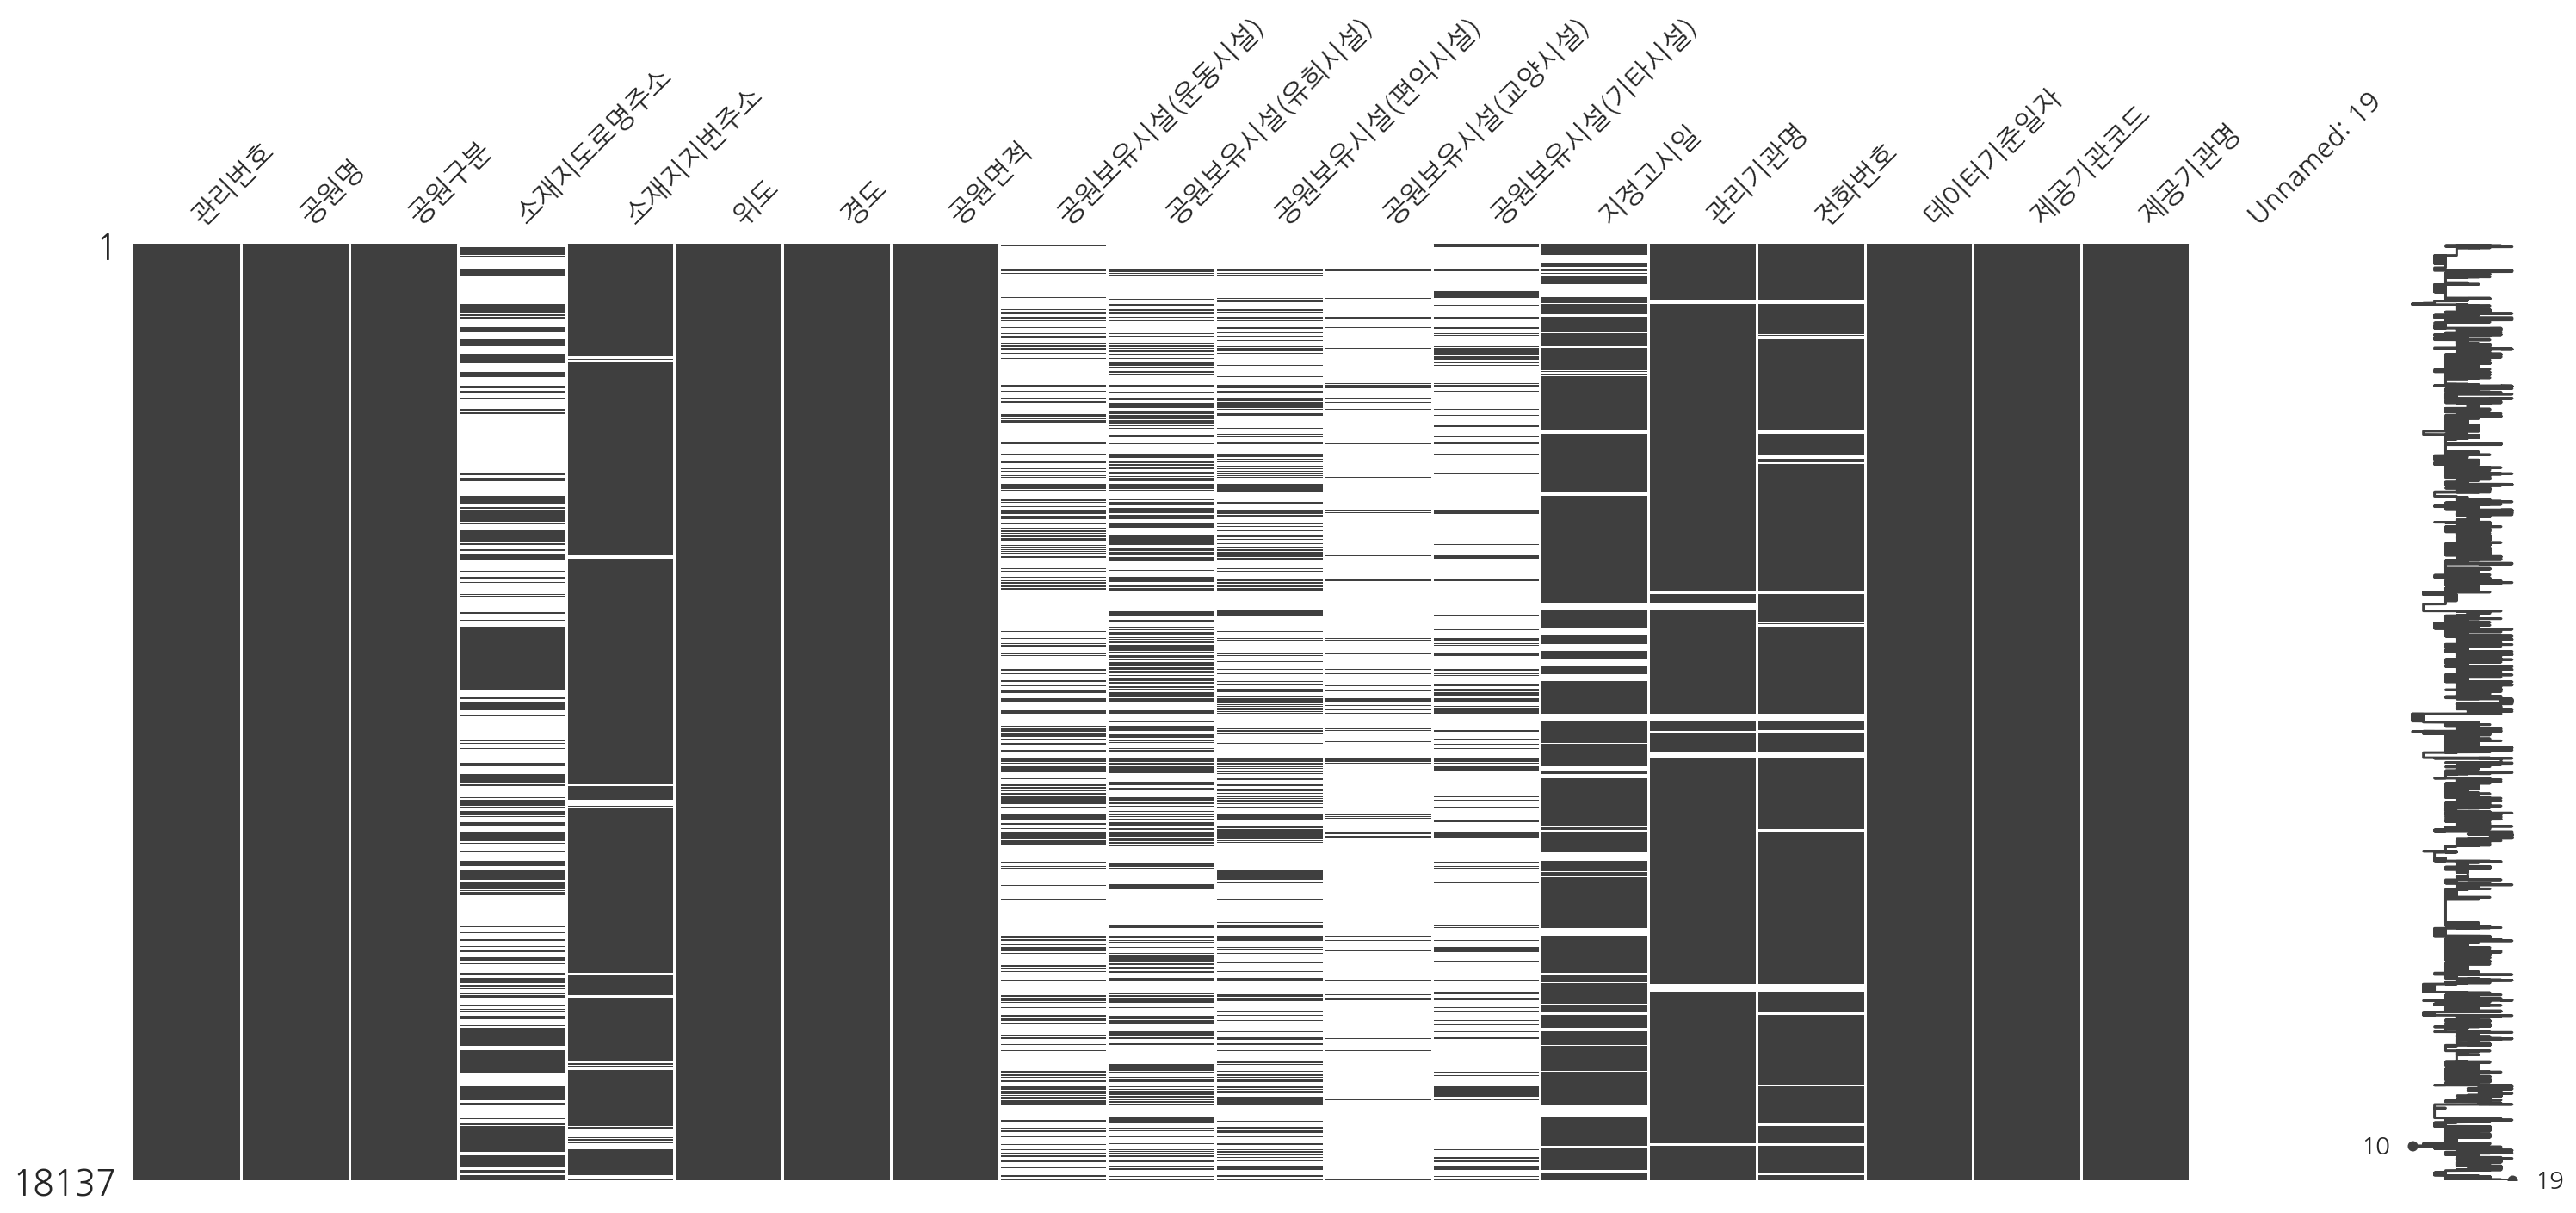

In [17]:
# 이전 챕터에서 설치하지 않았다면 아나콘다에 missingno를 설치합니다. 
# !conda install -c conda-forge missingno
# 라이브러리를 로드합니다.

import missingno

missingno.matrix(df)

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

<AxesSubplot:>

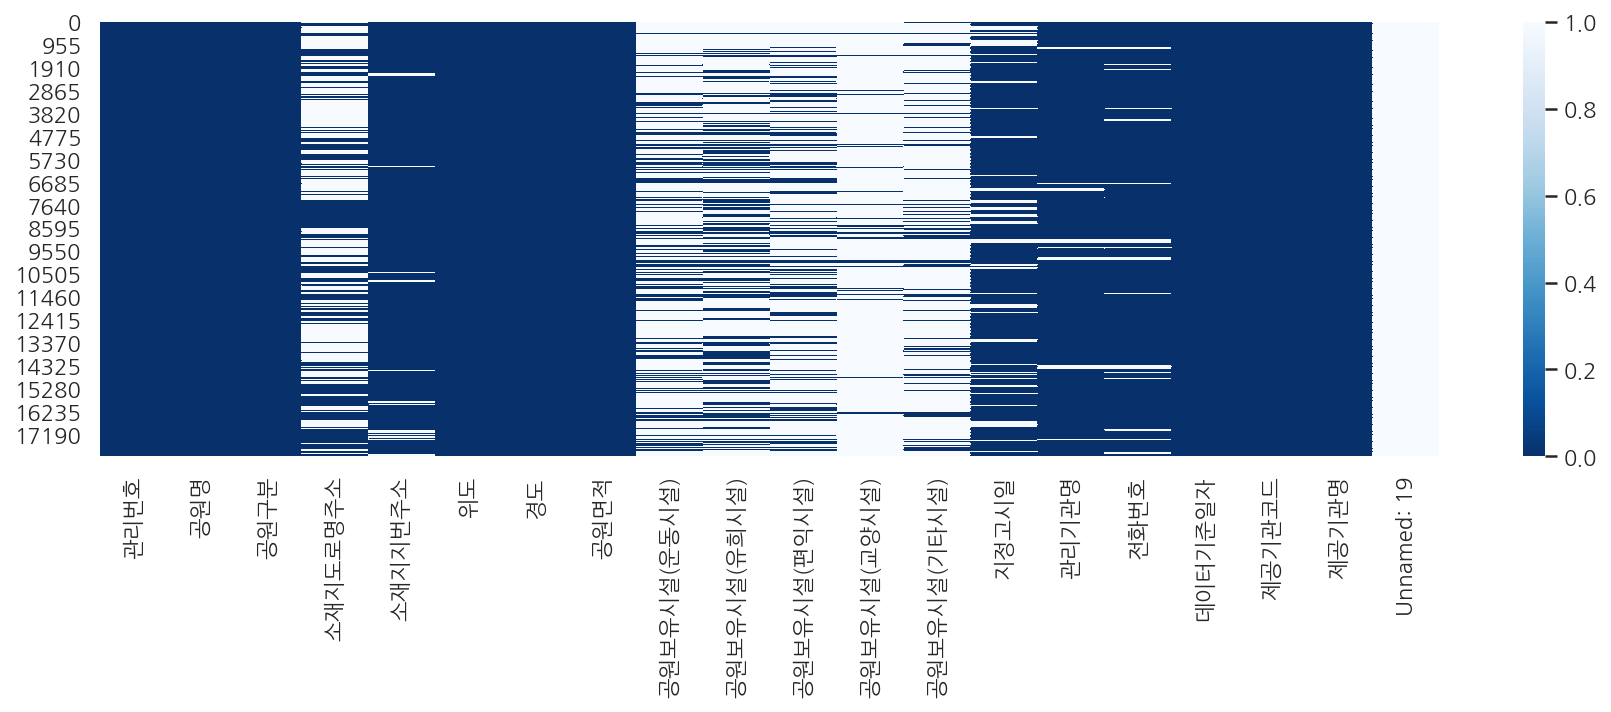

In [18]:
# seaborn을 통해 위와 같은 결측치 그래프를 그려봅니다.

null = df.isnull()

plt.figure(figsize=(15, 4))
sns.heatmap(null, cmap="Blues_r")

# 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

## 불필요한 컬럼 제거하기

In [19]:
# 전체 컬럼명을 출력해 봅니다.

df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [20]:
# drop 으로 'Unnamed: 19' 를 제거하기

print(df.shape)
df = df.drop(["Unnamed: 19"], axis=1)
print(df.shape)

(18137, 20)
(18137, 19)


## 결측치 대체
### 도로명 주소와 지번 주소 
* 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

In [23]:
# 도로명 주소의 널값 수

df['소재지도로명주소'].isnull().sum()

10098

In [24]:
# 지번 주소의 널값 수

df['소재지지번주소'].isnull().sum()

979

In [25]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾습니다.

df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape

(7060, 19)

In [26]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채웁니다.

df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])

In [27]:
# "소재지도로명주소"의 결측치수를 세어봅니다.

df['소재지도로명주소'].isnull().sum()

0

In [28]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터를 찾습니다.

df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

## 파생변수 만들기
### 주소를 통한 시도, 구군 변수 생성하기

In [29]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기

df["시도"] = df["소재지도로명주소"].str.split(expand=True)[0]
df[["소재지도로명주소", "시도"]].head(3)

,소재지도로명주소,시도
0,부산광역시 강서구 구랑동 1199-7,부산광역시
1,부산광역시 강서구 구랑동 1219,부산광역시
2,부산광역시 강서구 대저1동 1330-7,부산광역시


In [30]:
# 구군 가져오기

df["구군"] = df["소재지도로명주소"].str.split(expand=True)[1]
df[["소재지도로명주소", "시도", "구군"]].sample(3)

,소재지도로명주소,시도,구군
15837,대구광역시 달서구 미리샘길 26,대구광역시,달서구
13331,경기도 남양주시 진접읍 금곡리 1092,경기도,남양주시
9834,인천광역시 계양구 귤현동 248-1,인천광역시,계양구


In [31]:
# 시도 데이터의 빈도수 세어보기

df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [32]:
# 강원은 "강원도"로 변경해줄 필요가 보입니다.
df["시도"] = df["시도"].replace("강원", "강원도")
df["시도"].value_counts()


경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치 처리하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

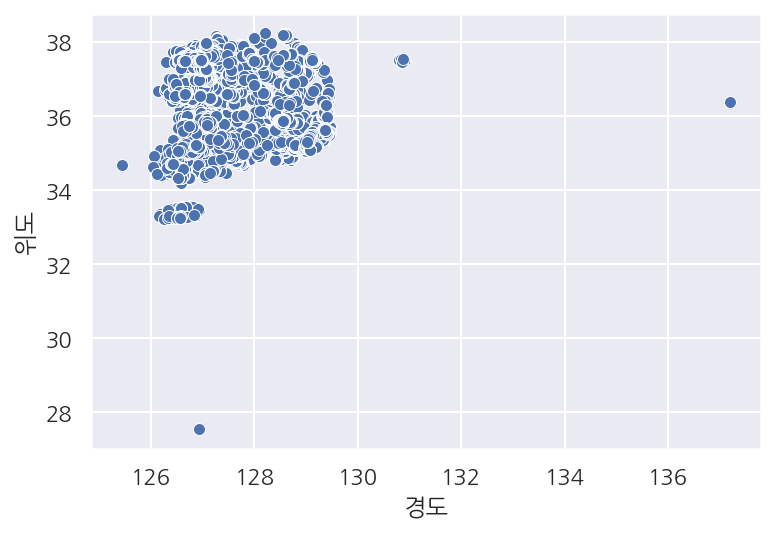

In [33]:
# 위경도 시각화

# 위경도 시각화
sns.scatterplot(data=df, x="경도", y="위도")

In [34]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담습니다.

df_park = df[(df["경도"] < 132) & 
             (df["위도"] > 32)].copy()

<AxesSubplot:xlabel='경도', ylabel='위도'>

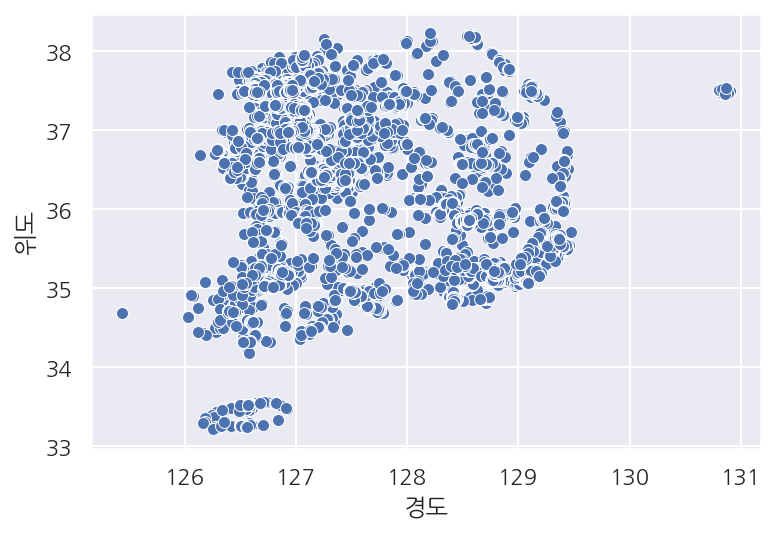

In [35]:
# 위도 경도의 아웃라이어 데이터가 제거되었는지 확인함

sns.scatterplot(data=df_park, x="경도", y="위도")

In [36]:
# 위도와 경도의 요약값을 describe 로 봅니다.

df[["위도", "경도"]].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


In [37]:
# 위경도가 잘못입력된 데이터를 봅니다.
# 주소가 잘못되지는 않았습니다.
# 주소를 통해 위경도를 다시 받아올 필요가 있습니다.

df[(df["경도"] > 132) | (df["위도"] < 32)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시


## 날짜 데이터 다루기

In [38]:
# 지정고시일의 데이터 타입을 봅니다.

df["지정고시일"].head(1)

0    2011-09-02
Name: 지정고시일, dtype: object

In [39]:
# 지정고시일의 데이터 타입을 datetime 형태로 변경합니다.

df["지정고시일"] = pd.to_datetime(df["지정고시일"])
df["지정고시일"].head(1)

0   2011-09-02
Name: 지정고시일, dtype: datetime64[ns]

In [40]:
# 고시연도와 고시월을 지정고시일에서 추출해서 파생변수를 만듭니다.

df["고시연도"] = df["지정고시일"].dt.year
df["고시월"] = df["지정고시일"].dt.month

df[["지정고시일", "고시연도", "고시월"]].head()

,지정고시일,고시연도,고시월
0,2011-09-02,2011.0,9.0
1,2008-02-28,2008.0,2.0
2,2013-01-23,2013.0,1.0
3,1998-07-25,1998.0,7.0
4,1995-04-07,1995.0,4.0


In [41]:
# 화랑공원의 고시연도를 찾아봅니다. 데이터 전처리가 맞게 되었는지 확인해 봅니다.

df.loc[df["공원명"].str.contains("화랑"), ["공원명", "고시연도"]]

,공원명,고시연도
3077,판교제8호(화랑)공원,2004.0
4310,화랑공원,2010.0
7316,화랑공원,1972.0
10490,화랑,2004.0
10763,화랑공원,1980.0
15066,화랑,1991.0


/home/atcis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/atcis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

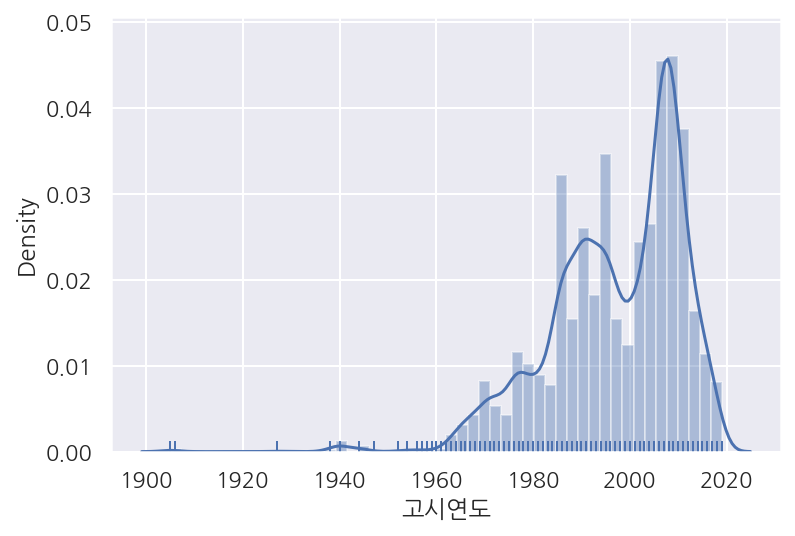

In [42]:
# 고시연도의 분포를 distplot 으로 그립니다.
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치가 없는 데이터만 따로 모아 그립니다.
sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"], rug=True)


* 판다스 스타일링 : [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
* 숫자의 많고 적음에 따라 heatmap 처럼 스타일을 표현 가능 합니다.

In [43]:
# 연도와 월별 고시 현황을 pivot_table로 그려봅니다.
# year_month 라는 변수에 담아 재사용 합니다.
# 데이터가 많기 때문에 2000년보다 크고 2019년보다 작은 연도의 데이터만 봅니다.

year_month = pd.pivot_table(df, index="고시연도", columns="고시월", 
               values="공원명", aggfunc="count")
year_month = year_month[(year_month.index > 2000) & 
                        (year_month.index < 2019)]
year_month.style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,48.000000,12.000000,7.000000,42.000000,21.000000,16.000000,6.000000,16.000000,30.000000,36.000000,37.000000,40.000000
2002.0,38.000000,19.000000,18.000000,10.000000,18.000000,14.000000,49.000000,17.000000,7.000000,7.000000,59.000000,55.000000
2003.0,21.000000,13.000000,17.000000,19.000000,10.000000,23.000000,4.000000,8.000000,7.000000,18.000000,48.000000,38.000000
2004.0,48.000000,18.000000,16.000000,18.000000,13.000000,24.000000,7.000000,48.000000,10.000000,24.000000,59.000000,135.000000
2005.0,55.000000,32.000000,18.000000,23.000000,43.000000,33.000000,16.000000,62.000000,18.000000,34.000000,60.000000,105.000000
2006.0,84.000000,34.000000,69.000000,31.000000,54.000000,32.000000,18.000000,33.000000,24.000000,36.000000,119.000000,120.000000
2007.0,69.000000,12.000000,9.000000,42.000000,16.000000,46.000000,62.000000,66.000000,84.000000,164.000000,245.000000,106.000000
2008.0,163.000000,45.000000,77.000000,42.000000,30.000000,102.000000,15.000000,61.000000,32.000000,20.000000,24.000000,126.000000
2009.0,59.000000,31.000000,162.000000,135.000000,57.000000,60.000000,36.000000,23.000000,96.000000,27.000000,73.000000,100.000000


## 텍스트 데이터 다루기
### 정규표현식 

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [45]:
# 정규표현식 라이브러리를 로드합니다.
# 설치가 필요 없이 파이썬에 내장되어 있는 라이브러리 입니다.
# 파이썬에 배터리 포함됨 이라는 특징이 있는데 이런 여러 표준 라이브러리가 잘 갖춰져 있습니다.
import re

### 공원 보유시설

In [46]:
# 컬럼이 너무 많으면 끝까지 보이지 않습니다. 
# options.display 를 사용해 max_columns 값을 채워줍니다.

pd.options.display.max_columns = 100

In [47]:
# 데이터를 미리보기 합니다.

df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0


### 운동시설
* 텍스트 데이터의 빈도수를 구합니다.
* 한 컬럼에 여러 텍스트가 , 혹은 - 등의 특수문자로 구분되어 있습니다.
* 데이터 전처리를 통해 텍스트의 빈도수를 구합니다.

In [48]:
# "공원보유시설(운동시설)" 의 빈도수를 세어 아래에서 5개만 봅니다.
df["공원보유시설(운동시설)"].value_counts(sort=False).head(5)

배드민턴장 1개소, 체력단련시설 5기    1
체력단련시설10                1
배드민턴장, 게이트볼장, 체력단련기구    1
축구장,배드민턴장,테니스장          1
위밍쇼울더 외3종               1
Name: 공원보유시설(운동시설), dtype: int64

In [49]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만듭니다.
# 그리고 다시 str 형태로 변경하고 gym 이라는 변수에 담습니다.


gym = df["공원보유시설(운동시설)"].unique().tolist()
gym = str(gym)
gym[:1000]

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

In [50]:
# 특수문자로 구분된 값을 , 로 구분되게 변경합니다.
# replace 기능을 사용해서 ,를 빈문자로 공백을 , 로 +를 ,로 변경합니다.

gym = gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("/", ",")
gym[:1000]

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [51]:
# 제거할 특수문자를 빈문자로 대체합니다.
# re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
# 정규표현식에서 +, *, . 등은 특별한 의미를 갖습니다. 
# 이런 문자를 제거할 때는 \를 통해 예외처리를 합니다. 
# 예를들어 .이라면 \. 으로 사용합니다.
# 여기에서는 숫자와 .을 제거하도록 합니다.
gym = re.sub("[\[\d\-nan\.\]]", "", gym)
gym = re.sub(",{2,}", ",", gym)
gym[:1000]


',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

In [52]:
# split을 사용해 문자열을 ,로 리스트형태로 만든 후에 
# 판다스의 시리즈 형태로 데이터를 만들면 빈도수를 구할 수 있습니다.
# 빈도수는 gym_count 라는 변수에 담습니다.


gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
dtype: int64

<AxesSubplot:>

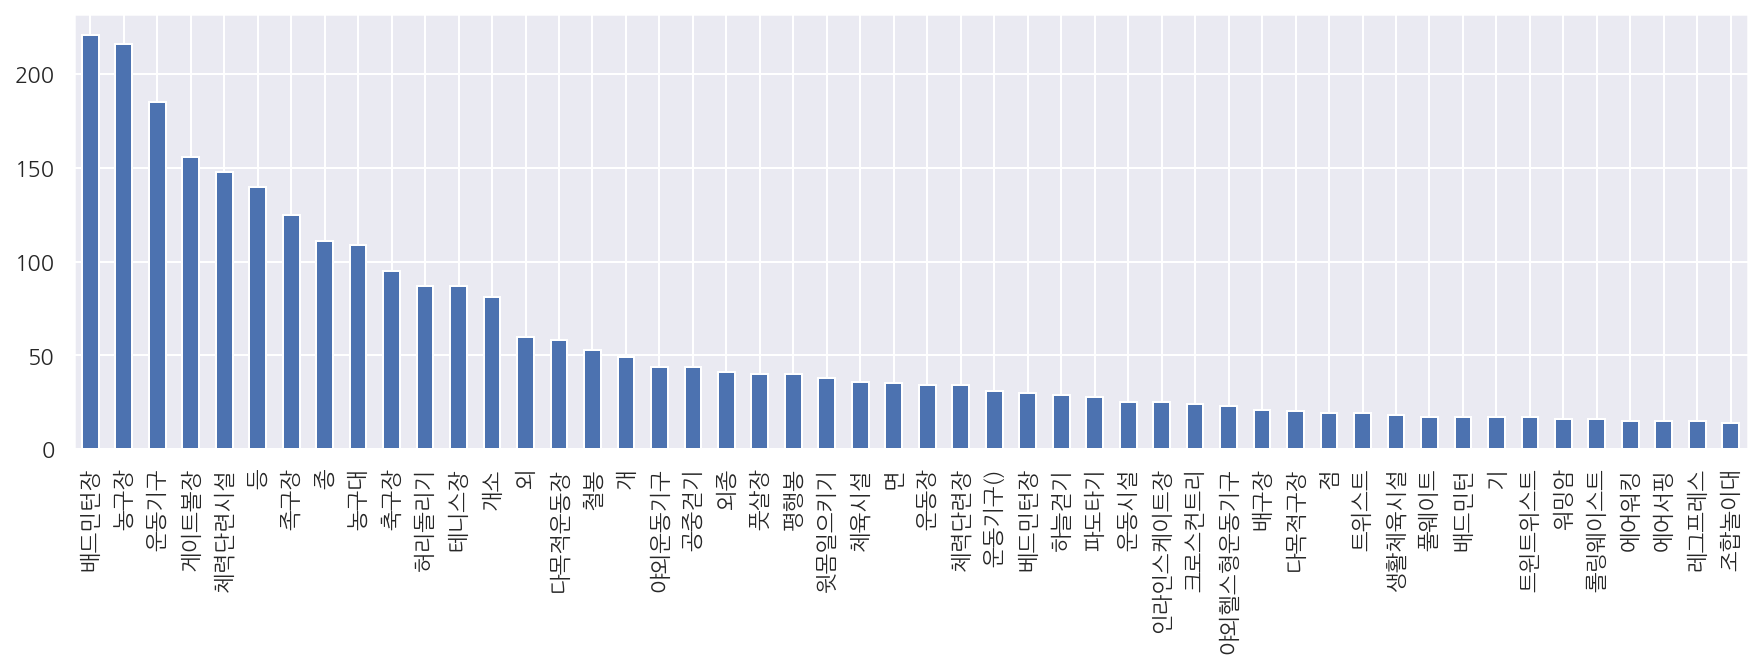

In [53]:
# 빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개 단어에 대한 그래프를 그립니다.

gym_count.head(50).plot.bar(figsize=(15, 4))

### 워드클라우드로 빈도수 표현하기
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다. 
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

In [54]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'


from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=["운동기구", "개소", "외종"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

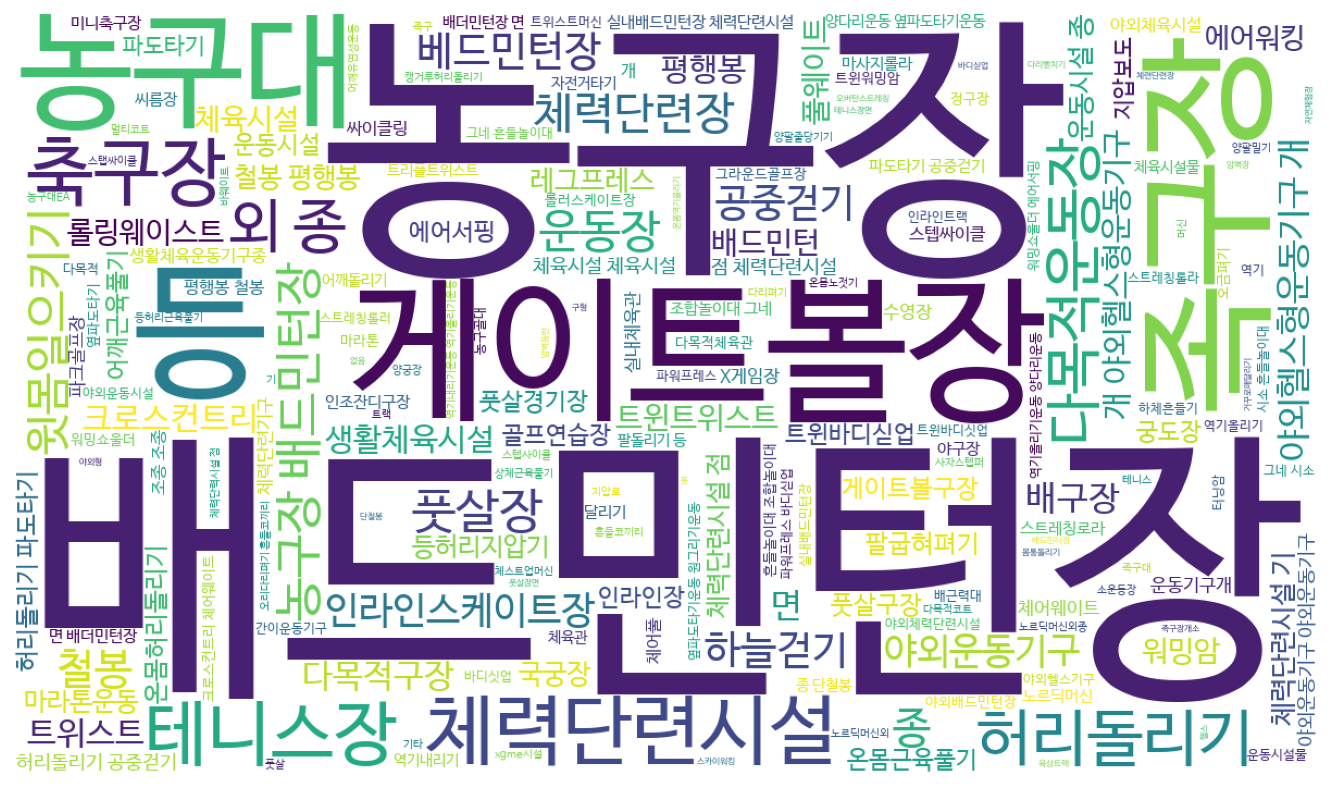

In [55]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.


wordcloud(gym, width=1200, height=700)

### 편익시설

In [56]:
# 편익시설에서 필요 없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다. 
# 함수명은 get_string 으로 합니다.
def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text = re.sub(" ", "", text)
    text = re.sub(",{2,}", ",", text)
    return text

In [57]:
# 함수가 잘 구현되었는지 확인해 봅니다.
# 다음의 문자를 전처리 했을 때  
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실,주차장,' 가 출력되는지 확인해 주세요.

get_string("[1. '화장실' 5, 2. 주차장, -, nan, /]")

'화장실,주차장,'

In [58]:
# 결측치를 넣어봅니다. 오류가 나지않는지 확인해 주세요.


get_string(np.nan)

nan

In [59]:
# map을 통해 위에서 구현한 함수를 적용해 줍니다.
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만듭니다.

df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head()

0    화장실
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [60]:
# 전처리 한 "편익시설"의 빈도수를 구하고 
# tail 로 끝부분에 있는 데이터를 미리보기 합니다.

df["편익시설"].value_counts().tail()

원두막,등의자                           1
화장실,음수대,먹는물공동시설                   1
화장실+세족장                           1
원형파고라A,평의자A,특화벤치A,공원안내판,자전거보관대    1
화장실개소,수도전개소                       1
Name: 편익시설, dtype: int64

In [61]:
type(np.nan)

float

In [62]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
# 따라서 결측치를 제외한 값만 가져와서 연결합니다.

fac = ",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [63]:
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환 합니다. 
# 위에서 만든 get_string 함수로 전처리를 합니다.

fac = str(df["편익시설"].tolist())
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [64]:
# ,가 2개 이상 들어가면 하나로 변경합니다.
# '화장실,주차장,,,' 텍스트를 정규표현식으로 바꿔봅니다.

re.sub(",{2,}", ",", '화장실,주차장,,,')

'화장실,주차장,'

In [65]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산합니다.


fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

<AxesSubplot:>

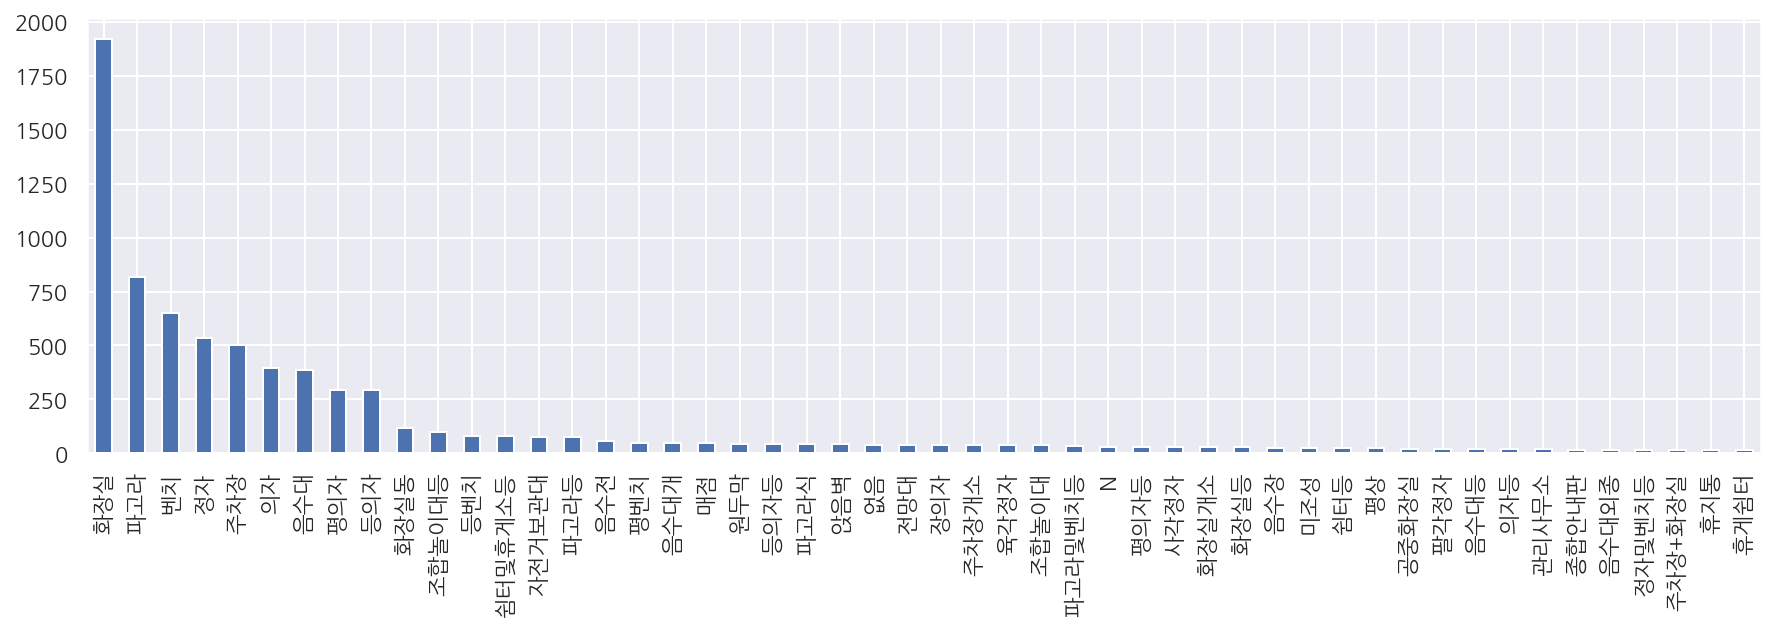

In [66]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.

fac_count.head(50).plot.bar(figsize=(15, 4))

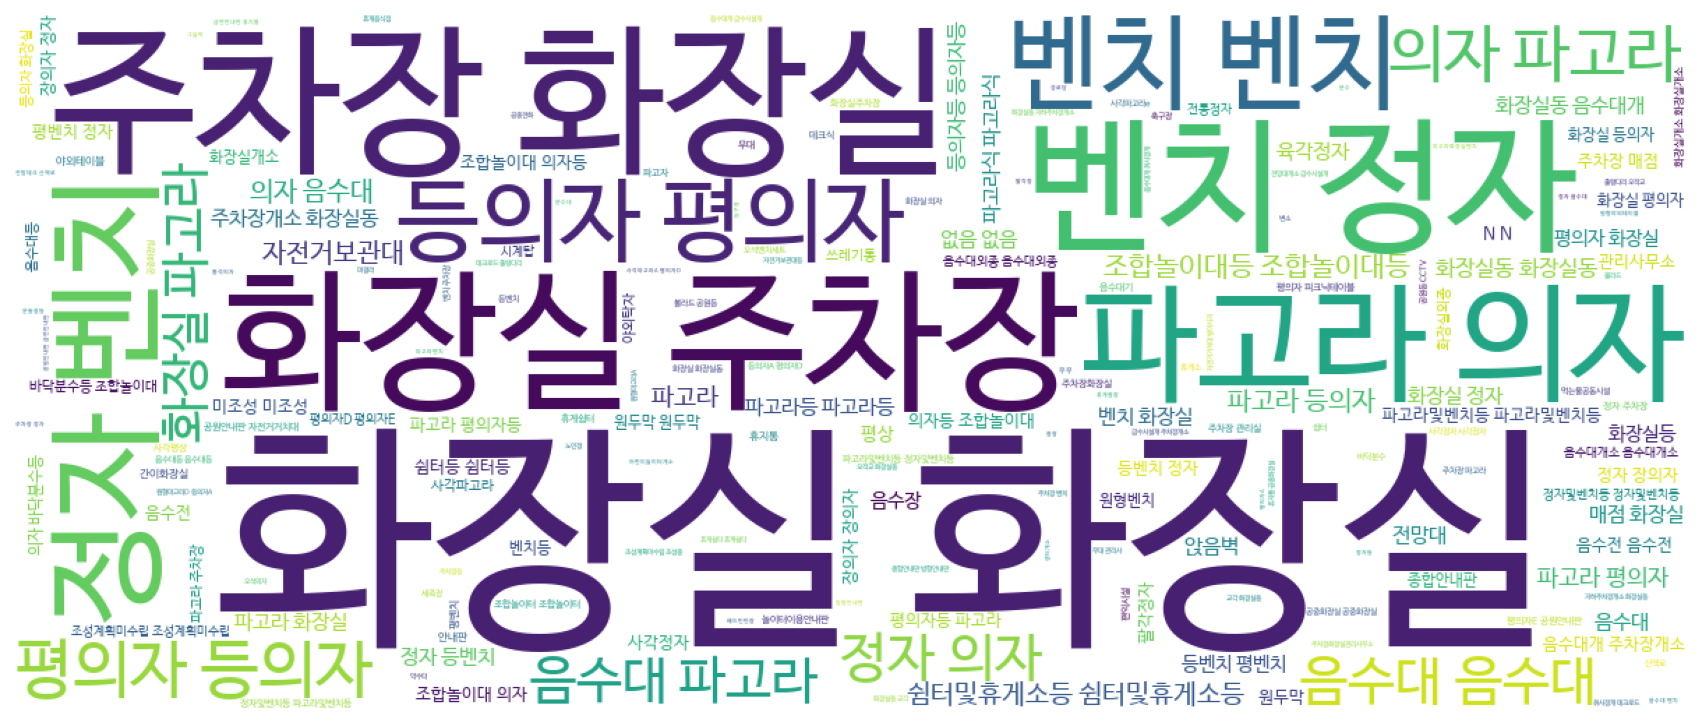

In [67]:
# 편익시설에 대한 워드클라우드를 위에서 정의한 wordcloud 함수로 그려봅니다.

wordcloud(fac)

### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [68]:
# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다.

facilities = ["화장실", "주차장", "음수대", "파고라", "정자", 
              "벤치", "의자", "놀이터", "축구장", "야영장", "CCTV"]

df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [69]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 들어가면 True, 아니면 False로 값이 표현되도록 합니다.

for f in facilities:
    df[f] = df_fac["공원보유시설(편익시설)"].str.contains(f)

In [70]:
# facilities 리스트로 만든 각 컬럼의 빈도수를 구합니다. 

df[facilities].sum()

화장실     2208.0
주차장      611.0
음수대      493.0
파고라     1032.0
정자       648.0
벤치       850.0
의자       949.0
놀이터       21.0
축구장        6.0
야영장        3.0
CCTV       6.0
dtype: float64

## 특정 정보 마스킹
### 전화번호 마스킹

In [71]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다. 
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.

re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-1234-5678")

'010-12**-**78'

In [76]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-5678"

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-12-5678")

'010-12-5678'

In [77]:
# 가운데가 2자리일 때는 마스킹 없이 보이는지 확인하기 "010-12-5678"

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "+82-10-1234-5678")

'+82-10-1234-5678'

In [78]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "+82-10-1234-5678")

'+82-10-1234-5678'

In [79]:
# 함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
# 국제번호 등 다양한 형식의 번호가 들어왔을 때 
# - 를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되, 
# 마지막 자리는 앞 두자리만 마스킹 합니다.
# 함수명은 mask_phone_number 로 합니다.


def mask_phone_number(phone):
    
    if pd.isnull(phone):
        return phone
    
    num = phone.split("-")
    num_len = len(num) // 2
    
    num[num_len] = re.sub("\w", "*", num[num_len])
    num[-1] = re.sub("(\d{2})(\d{2})", r"**\2", num[-1])
    
    return "-".join(num)

mask_phone_number(phone)

'+82-10-****-**78'

In [ ]:
# 결측치가 들어갔을 때 오류가 날 수 있기 때문에 결측치를 체크합니다.

mask_phone_number(np.nan)

In [ ]:
# 위에서 만든 함수를 map을 통해 "전화번호" 컬럼에 적용합니다.

df["전화번호(전처리)"] = df["전화번호"].map(mask_phone_number)
df[["공원명", "전화번호", "전화번호(전처리)"]].sample(10)

### 이메일 주소 마스킹
* 해당 데이터에는 이메일 주소가 없지만 정규표현식을 더 연습해 보기 위해 이메일주소도 마스킹처리를 해봅니다.

In [ ]:
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.
email = "address@mail.com"


In [ ]:
# 이메일 주소 아이디의 일부만 마스크처리 합니다. 
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리리를 합니다.
email = "address@mail.com"



In [ ]:
# 위에서 작성한 예제를 함수로 만듭니다.

mask_email(email)

In [ ]:
# "1234address_123@gmail.com"를 마스킹 처리 합니다.


### 자동차 등록번호 마스킹
* 역시나 해당 데이터에는 자동차 등록번호가 없지만 정규표현식을 더 연습해 보기 위해 마스킹처리를 해봅니다.

In [ ]:
# 자동차 등록번호를 마스킹 합니다. 
# r'*\2\3**\5' 여기에서 \1 에 해당되는 한글 앞의 숫자는 
# 몇 자리가 들어가든 한글 바로 앞의 마지막 한자리만 봅니다.
# 따라서 앞에 있는 숫자는 마지막 번호만 마스킹 하게 됩니다.
car_num = "32가1234"



In [ ]:
# 자동차 등록번호를 마스킹 합니다. 
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."


# 데이터 요약하기
## 수치형, 범주형 변수 구분하기

In [ ]:
# data_types 변수에 데이터 타입만 따로 모으기



## 수치형 변수 요약

In [ ]:
# 수치형 변수 구하기
# var_numbers 변수에 담습니다.



In [ ]:
# 히스토그램을 그리면 수치형 변수에 대한 빈도수 분포를 확인할 수 있습니다.
# 빈도수 분포 => 도수 분포표를 시각화 합니다.



In [ ]:
# describe 를 통해 요약합니다.



## 범주형 변수 요약

In [ ]:
# 범주형 변수 구하기
# var_objects 라는 변수에 저장합니다.



In [ ]:
# 문자열 타입의 데이터 describe 로 요약하기


## crosstab
* 범주형 변수끼리의 빈도수 구하기

In [ ]:
# 관리기관과 공원구분에 따른 빈도수를 구합니다.
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑습니다.
# 숫자의 많고 적음 표시를 위해 style.background_gradient() 를 사용합니다.
# 결과를 manage_category 변수에 담습니다.


In [ ]:
# "시도" 별 "공원구분" 의 수를 구합니다.


# 시도별 공원 분포

## 시도별 공원 비율

In [ ]:
# 시도별로 합계 데이터를 출력



In [ ]:
# 합계와 비율을 함께 구합니다.
# city 라는 변수에 담습니다.



## 공원구분별 분포

In [ ]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.



## 시도별 공원분포

In [ ]:
# 시도별로 scatterplot 의 색상을 다르게 표현하고 공원면적에 따라 원의 크기를 다르게 그립니다.



https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [ ]:
# countplot 으로 시도별 빈도수를 그립니다.



## 특정 공원구분 가져오기

In [ ]:
# "공원구분"별로 빈도수를 구합니다.



In [ ]:
# str.match를 통해 특정 텍스트가 들어가는 공원만 가져오기
# ".*"는 앞뒤로 어떤 문자가 등장하든 상관없다는 의미입니다.
# 따라서 아래의 정규표현식 대신 r'(역사|체육|수변|문화)공원'를 사용해도 똑같이 동작합니다.
park_type = r'.*((역사|체육|수변|문화)공원).*'



In [ ]:
# 위에서 정의한 var_numbers 라는 변수를 가져와 출력해 봅니다.



In [ ]:
# 리스트 다루기 - var_pair 라는 변수에 리스트를 만들어서 값을 추가하고 삭제해 봅니다.
# 기존 리스트에 "공원구분" 원소 추가하기 "공원구분"에 따라 색상을 다르게 표현해 보기 위함
# var_pair 라는 변수에 담습니다. 



In [ ]:
# 기존 리스트의 원소를 제거하기 - '지정고시일', '고시연도', '고시월'
# 제거 한 후 다시 제거하려고 하면 다음과 같은 오류가 발생할 수 있습니다.
# ValueError: list.remove(x): x not in list



In [ ]:
# 위에서 가져온 var_pair 라는 변수에 담긴 리스트에 있는 컬럼을 사용해 pairplot을 그립니다.


## 피봇테이블로 시도별 공원수와 평균면적 구하기

In [ ]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다.



## 내가 사는 지역의 공원을 지도에 표시해 보기

In [ ]:
# 경기도 성남시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.



In [ ]:
# "시도", "구군", "공원명" 컬럼만 미리보기 합니다.



### 특정 공원 정보 찾아보기
* 판교의 화랑공원을 찾아봅니다.

In [ ]:
# str.contains 로 "공원명"에 "화랑"이 들어가는 데이터를 찾습니다.



In [ ]:
# cols 컬럼에 특정 컬럼만 불러와서 봅니다.
# '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)' 



###  지도에 표현하기
* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [ ]:
# folium 으로 지도에 표현해 봅니다.
# 지도에서 한글이 깨지면 html 문서로 저장해서 보세요

